# Week 8
# New York Taxi Trip Duration
Today let's look at an actual data analysis challenge: analyzing NYC taxi trip durations. This was originally a competition on Kaggle in 2017.

## Data
The data is available [here](https://www.kaggle.com/c/nyc-taxi-trip-duration/data).
- Read the description of the data set.
- Download the three zip files.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import folium
# a command that allow figures to show automatically
%matplotlib inline 

# Get to know the data
The first step of data analysis is usually to collect overall information of the data sets:
- Is the data set properly loaded?
- What is the size of the data set?
- What features are available? 
- What does each feature represent?
- Which features are relavent to this project?

In [3]:
# Decompress train.zip
# Load train.csv


# unzip nyc-taxi-trip-duration.zip
file_name = "C:\\Users\\lzhao\\Downloads\\nyc-taxi-trip-duration.zip" # we use absolute path here
        # Use \\ to represent the bask-slash character
        # alternatively, we can use /
        # "C:/Users/lzhao/Downloads/nyc-taxi-trip-duration.zip"
f = zipfile.ZipFile(file_name, "r")
f.printdir() # display the content
f.extractall("Data/nyctaxi")
f.close()

File Name                                             Modified             Size
sample_submission.zip                          2019-12-11 04:01:24      2615198
test.zip                                       2019-12-11 04:01:26     21327372
train.zip                                      2019-12-11 04:01:34     65967663


In [6]:
# unzip train.zip
f = zipfile.ZipFile("Data/nyctaxi/train.zip", "r")
f.printdir()
f.extractall("Data/nyctaxi/")
f.close()

File Name                                             Modified             Size
train.csv                                      2017-07-19 11:26:56    200589097


In [9]:
# Load the training data set
raw_data = pd.read_csv("Data/nyctaxi/train.csv", sep=',')
raw_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [12]:
# raw_data.tail() # shows the last several rows
# raw_data.sample(5) # shows some randomly sampled rows

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
603701,id3304162,2,2016-03-11 14:31:34,2016-03-11 14:33:30,1,-73.995262,40.765160,-73.999420,40.761700,N,116
82526,id2520204,1,2016-03-21 13:35:44,2016-03-21 13:39:52,1,-73.963478,40.774296,-73.968224,40.765446,N,248
1150851,id1470383,1,2016-05-23 19:32:57,2016-05-23 19:42:20,4,-73.985878,40.759026,-73.984612,40.748455,N,563
1310410,id1246085,2,2016-04-11 19:26:35,2016-04-11 19:30:55,1,-73.955437,40.773479,-73.945618,40.777950,N,260
574054,id2784340,1,2016-05-11 08:57:25,2016-05-11 08:58:12,2,-74.005165,40.713722,-74.006065,40.713993,N,47


In [13]:
# Display the size of the data set
print(raw_data.shape)
# If processing all 1.5 million records is challenging for your computer, 
# create a smaller sampled data set.
# sub_set = raw_data.sample(10000)

(1458644, 11)


In [14]:
# Display feature names
print(raw_data.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [15]:
# Display their data types
print(raw_data.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [18]:
# Change the data type of the datetime columns
raw_data['pickup_datetime'] = raw_data['pickup_datetime'].astype(np.datetime64)
raw_data['dropoff_datetime'] = raw_data['dropoff_datetime'].astype(np.datetime64)

print(raw_data.dtypes)

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object


In [ ]:
# It is recommended that we create a function to do all the operations above
# def load_taxi_data():
#     #######
#     return raw_data

# raw_data = load_taxi_data()

# Examine each relavent feature
- Any missing values?
- The distribution of the data? (histogram / frequency counts)
- Any outliers? Can they be mistakes or something special?
- Consistency check
    - Is dropoff_time always greater than pickup_time?
    - Is the difference between dropoff_time and pickup_time equal to trip_duration?
    - Is the difference between dropoff_time and pickup_time too large to be accurate?
    - Is the difference between dropoff_time and pickup_time too small to be accurate?

In [20]:
# Check for missing values
raw_data.isnull().sum()
# Luckily, there are no missing values.

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [21]:
# Find min, max, mean, median of the features.

raw_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


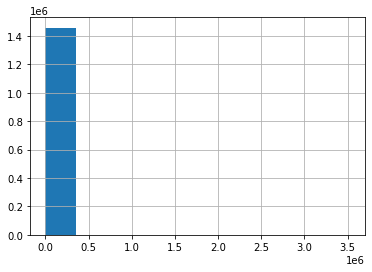

In [22]:
# Examine trip durations
# Create a histogram of trip durations
raw_data['trip_duration'].hist()
# raw_data['trip_duration'].plot.hist()

In [24]:
# Investigate outliers in the trip duration column 
data = raw_data.sort_values(by="trip_duration", ascending=False)
data.head(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387
1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385
753765,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.006111,40.734680,-73.958809,40.815449,N,86379


In [30]:
# Are these 20 longest trip mistakes?
# Visualize the locations using Folium
nyc = folium.Map(location=[40.7128, -74.0060],
                 zoom_start=10)
pickup = folium.Marker(location=[40.648632, -73.783905], popup="Pick-up Location")
pickup.add_to(nyc)

dropoff = folium.Marker(location=[40.750202, -73.978271], popup="Drop-off Location")
dropoff.add_to(nyc)
nyc # Judging from the locations, it is impossible that this trip took 40 days

In [34]:
# Set up a upper limit for trip durations.
limit = 7200
# how many records are there with duration > limit?
long_trips = raw_data[raw_data['trip_duration'] > limit]
print(long_trips.shape)

print(2253 / 1.5e6)

(2253, 11)
0.001502


(1456391, 11)


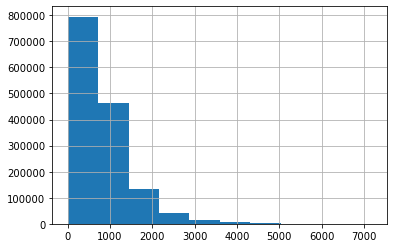

In [37]:
# Let's remove these records from the data set
data = raw_data.drop(long_trips.index)
print(data.shape)
data['trip_duration'].hist()

In [40]:
# Let's also check those extremely short trips
limit = 60
short_trips = data[data['trip_duration'] < limit]
print(short_trips.shape)
short_trips = short_trips.sort_values(by='trip_duration')
short_trips.head()

(8595, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1165514,id2757288,1,2016-04-03 23:53:28,2016-04-03 23:53:29,1,-73.845016,40.874332,-73.845016,40.874332,N,1
451396,id2836747,1,2016-01-26 10:47:22,2016-01-26 10:47:23,1,-74.001610,40.737450,-74.001610,40.737450,N,1
346959,id1171557,1,2016-02-10 16:33:43,2016-02-10 16:33:44,1,-73.776512,40.646454,-73.776512,40.646454,N,1
761666,id1363579,1,2016-04-26 14:33:09,2016-04-26 14:33:10,1,-73.978676,40.715626,-73.978691,40.715626,N,1
1296239,id0948644,2,2016-02-22 00:40:25,2016-02-22 00:40:26,0,-73.987595,40.719997,-73.987595,40.720005,N,1


In [41]:
# Remove those extremely short trips
data = data.drop(short_trips.index)
data.shape

(1447796, 11)

In [42]:
# Examine vender IDs

data['vendor_id'].value_counts()

2    774632
1    673164
Name: vendor_id, dtype: int64

Text(0.5, 1.0, 'Vendor 2')

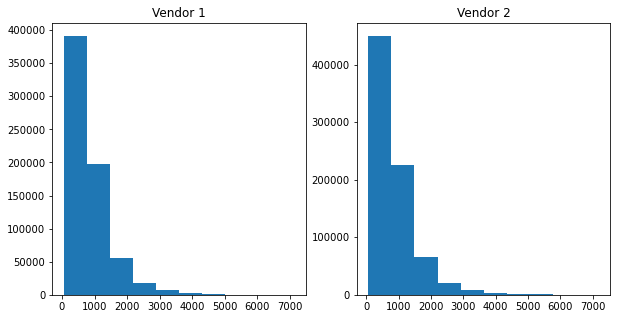

In [47]:
# Does it matter which vendor the record come from?
# Visualize the distribution of trip durations for record from each vendor.

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(data[data['vendor_id'] == 1]['trip_duration'])
ax1.set_title("Vendor 1")

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(data[data['vendor_id'] == 2]['trip_duration'])
ax2.set_title("Vendor 2")


`Vendor ID` does not matter to trip duration. We can ignore this feature from now on.

In [ ]:
# Examine passenger counts



In [ ]:
# Remove rows where passenger count is zero.



In [ ]:
# Examine flags



In [ ]:
# Examine pick-up date and time.



In [ ]:
# Examine drop-off date and time.



In [ ]:
# Examine pick-up logitude and latitude



In [ ]:
# Remove outliers



In [ ]:
# Visualize pick-up locations



In [ ]:
# Visualize drop-off locations



# Examine the relationship
- Relationship of a single feature and the trip duration
- Create additional useful features
    - Distance between pick-up and drop-off
    - Hour of the day
    - Day of the week
    - Weekdays vs. weekends
    - Holidays?
    - Weather?
- Relationship of multiple features and the trip duration

In [ ]:
# Does vendor ID matter to trip durations?



In [ ]:
# Does passenger count matter to trip durations?



In [ ]:
# Create a column representing the aerial distance between pickup and dropoff
# Aerial distance = np.sqrt((x2 - x1) ** 2 + (y2 - y2) ** 2)



In [1]:
# Does the aerial distance matter to trip durations?

